In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier

In [4]:
data_train = pd.read_csv('C:\\Users/andre/Downloads/titanic/train.csv')
data_test = pd.read_csv('C:\\Users/andre/Downloads/titanic/test.csv')


In [89]:
train_y=pd.read_csv('C:\\Users/andre/Downloads/titanic/train.csv')
test_y = pd.read_csv('C:\\Users/andre/Downloads/titanic/test.csv')
test_y

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [64]:
y = train_y['Survived']

In [23]:
data_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
data_train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [18]:
data_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [21]:
data_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [26]:
data_train['Age'].fillna(data_train['Age'].median(),inplace=True)
data_test['Age'].fillna(data_test['Age'].median(),inplace=True)
data_train['Embarked'].fillna('S',inplace=True)
data_test['Fare'].fillna(data_train['Fare'].median(),inplace=True)


In [45]:
data_train = pd.concat(
    [
        data_train,
        pd.get_dummies(data_train['Pclass'],prefix="PClass"),
        pd.get_dummies(data_train['Sex'],prefix="Sex"),
        pd.get_dummies(data_train['SibSp'],prefix="SibSp"),
        pd.get_dummies(data_train['Parch'],prefix="Parch"),
        pd.get_dummies(data_train['Embarked'],prefix="Embarked")
    ],
    axis=1
)

data_test = pd.concat(
[
    data_test,
        pd.get_dummies(data_test['Pclass'],prefix="PClass"),
        pd.get_dummies(data_test['Sex'],prefix="Sex"),
        pd.get_dummies(data_test['SibSp'],prefix="SibSp"),
        pd.get_dummies(data_test['Parch'],prefix="Parch"),
        pd.get_dummies(data_test['Embarked'],prefix="Embarked")
],
    axis=1
)

In [47]:
data_train.drop([
    "Survived",
        "Pclass",
        "Name",
        "Sex",
        "SibSp",
        "Parch",
        "Ticket",
        "Cabin",
        "Embarked",
        "PassengerId",
],axis=1,inplace=True)

data_test.drop(
    [
        "Pclass",
        "Name",
        "Sex",
        "SibSp",
        "Parch",
        "Ticket",
        "Cabin",
        "Embarked",
        "PassengerId",
    ],
    axis=1,
    inplace=True,
)

In [48]:
data_train

,Age,Fare,PClass_1,PClass_2,PClass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,22.0,7.2500,0,0,1,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
1,38.0,71.2833,1,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
2,26.0,7.9250,0,0,1,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
3,35.0,53.1000,1,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
4,35.0,8.0500,0,0,1,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,13.0000,0,1,0,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,1
887,19.0,30.0000,1,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
888,28.0,23.4500,0,0,1,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
889,26.0,30.0000,1,0,0,0,1,1,0,0,...,1,0,0,0,0,0,0,1,0,0


In [69]:
data_test

,Age,Fare,PClass_1,PClass_2,PClass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,34.5,7.8292,0,0,1,0,1,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,47.0,7.0000,0,0,1,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
2,62.0,9.6875,0,1,0,0,1,1,0,0,...,1,0,0,0,0,0,0,0,1,0
3,27.0,8.6625,0,0,1,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,1
4,22.0,12.2875,0,0,1,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,27.0,8.0500,0,0,1,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,1
414,39.0,108.9000,1,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
415,38.5,7.2500,0,0,1,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,1
416,27.0,8.0500,0,0,1,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,1


In [59]:
data_train.shape, data_test.shape

((891, 24), (418, 24))

In [60]:
set(data_test.columns)-set(data_train.columns)

set()

In [61]:
data_test.drop("Parch_9",axis=1,inplace=True)

KeyError: "['Parch_9'] not found in axis"

In [65]:
X = data_train

In [62]:
clf = DecisionTreeClassifier(max_depth=2,random_state=17)

In [66]:
clf.fit(X,y)

DecisionTreeClassifier(max_depth=2, random_state=17)

In [95]:
answer_pd = clf.predict(data_test)

In [97]:
submission = pd.DataFrame({'PassengerId':test_y.PassengerId.values,'Survived':answer_pd})

In [99]:
submission.to_csv('mysubmission.csv',index=False)

In [140]:
from sklearn import tree

[Text(167.4, 181.2, 'X[6] <= 0.5\ngini = 0.473\nsamples = 891\nvalue = [549, 342]'),
 Text(83.7, 108.72, 'X[4] <= 0.5\ngini = 0.383\nsamples = 314\nvalue = [81, 233]'),
 Text(41.85, 36.23999999999998, 'gini = 0.1\nsamples = 170\nvalue = [9, 161]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.5\nsamples = 144\nvalue = [72, 72]'),
 Text(251.10000000000002, 108.72, 'X[0] <= 6.5\ngini = 0.306\nsamples = 577\nvalue = [468, 109]'),
 Text(209.25, 36.23999999999998, 'gini = 0.444\nsamples = 24\nvalue = [8, 16]'),
 Text(292.95, 36.23999999999998, 'gini = 0.28\nsamples = 553\nvalue = [460, 93]')]

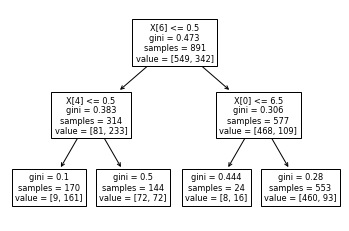

In [141]:
tree.plot_tree(clf)

In [104]:
from sklearn.tree import export_graphviz

In [111]:
d = export_graphviz(clf,out_file='tree.dot', 
                rounded = True, proportion = False, 
                precision = 2, filled = True)

In [114]:
from sklearn.model_selection import GridSearchCV

In [113]:
params = {'max_depth':range(1,5),'min_samples_leaf':range(1,5)}

In [115]:
clf2 = DecisionTreeClassifier()

In [118]:
%%time
search = GridSearchCV(clf2,params,cv=5,n_jobs=-1)

Wall time: 0 ns


In [119]:
%%time
search.fit(X,y)

Wall time: 28.7 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(1, 5),
                         'min_samples_leaf': range(1, 5)})

In [120]:
search.best_params_

{'max_depth': 3, 'min_samples_leaf': 3}

In [121]:
search.best_score_

0.8103132257862031

In [132]:
answ = search.predict(data_test)
answ

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [134]:
Submission_2 = pd.DataFrame({'PassengerId':test_y.PassengerId.values,'Survived':answ})

In [135]:
Submission_2.to_csv('Submission_2.csv',index=False)

In [145]:
A = np.array([1, 5, 2, 7, 1, 9, 3, 8, 5, 9])
A.std()

3.0